# Modelo da exportação 4

Criação de modelos baseado na versão 4 de transformação dos dados. Baseado [neste notebook](https://github.com/Msanjayds/Kaggle_Projects/blob/master/1.%20Titanic%20Survival%20Prediction/Titanic_challenge.ipynb).

## Preparando o ambiente

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [10, 6]
}
plot.rcParams.update(params)

In [2]:
SEED = 1
np.random.seed(SEED)

## Carregando os dados

In [3]:
treino = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v4/train.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v4/test.csv')
#Xvalidation = teste.drop(columns=['PassengerId'])
validation_passanger_ids = teste['PassengerId']

teste.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Singleton,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,892,3,2,34.5,0,0,81,7.8292,1,1,...,0,0,0,1,0,0,1,0,0,0
1,893,3,1,47.0,1,0,98,7.0000,2,0,...,0,0,0,1,0,0,0,1,0,0
2,894,2,2,62.0,0,0,45,9.6875,1,1,...,0,0,0,1,0,0,1,0,0,0
3,895,3,2,27.0,0,0,77,8.6625,1,1,...,0,0,0,1,0,0,1,0,0,0
4,896,3,1,22.0,1,1,74,12.2875,3,0,...,0,0,0,1,0,0,0,1,0,0


In [4]:
X = treino.drop(columns=['Survived'])
y = treino['Survived']

In [5]:
def split_vals(a,n): return a[:n], a[n:]

In [6]:
valid_count =60
n_trn = len(X)-valid_count
x_train1, x_valid1 = split_vals(X, n_trn)
y_train1, y_valid1 = split_vals(y, n_trn)

In [7]:
x_train1.shape,y_train1.shape,x_valid1.shape,y_valid1.shape

((831, 29), (831,), (60, 29), (60,))

In [8]:
m = RandomForestClassifier(n_estimators=180,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(x_train1,y_train1)
m.score(x_train1,y_train1)

0.9326113116726835

In [9]:
y_predict=m.predict(x_valid1)
accuracy_score(y_valid1,y_predict)

0.85

In [10]:
print(classification_report(y_valid1,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.81      0.77      0.79        22

    accuracy                           0.85        60
   macro avg       0.84      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



In [11]:
print(confusion_matrix(y_valid1,y_predict))

[[34  4]
 [ 5 17]]


In [12]:
start_time = time.time()
importances = m.feature_importances_
std = np.std([tree.feature_importances_ for tree in m.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [13]:
feature_names = m.feature_names_in_

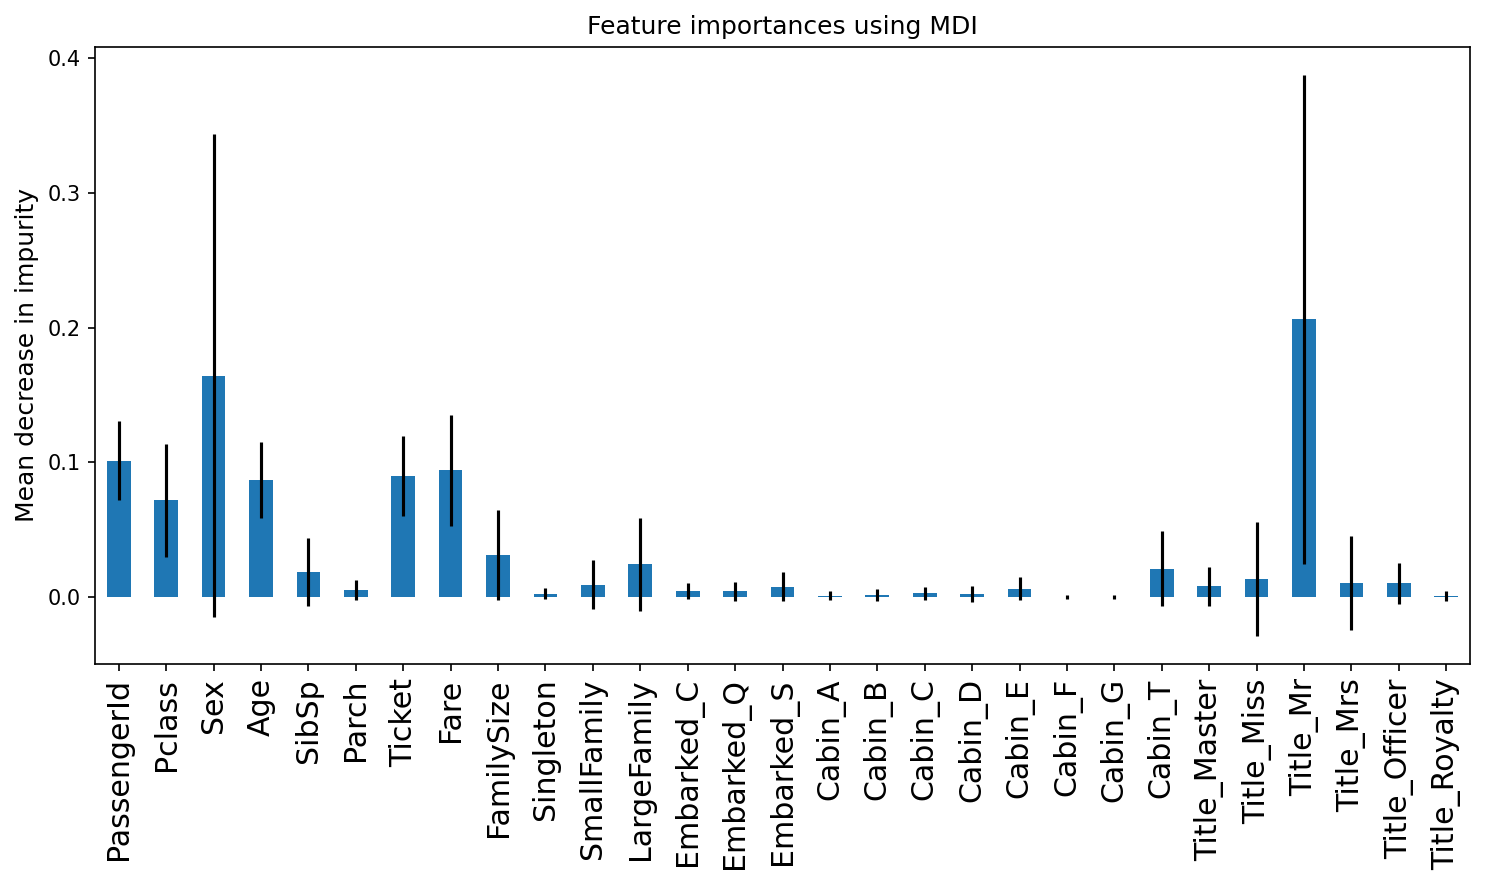

In [14]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [15]:
df_importance = pd.DataFrame(data={
    "feature": feature_names,
    "importance": importances
})
df_importance.sort_values(by="importance", ascending=False, inplace=True)
df_importance

,feature,importance
25,Title_Mr,0.206187
2,Sex,0.164499
0,PassengerId,0.101292
7,Fare,0.094240
6,Ticket,0.089772
3,Age,0.086819
1,Pclass,0.071761
8,FamilySize,0.031207
11,LargeFamily,0.024209
22,Cabin_T,0.021190


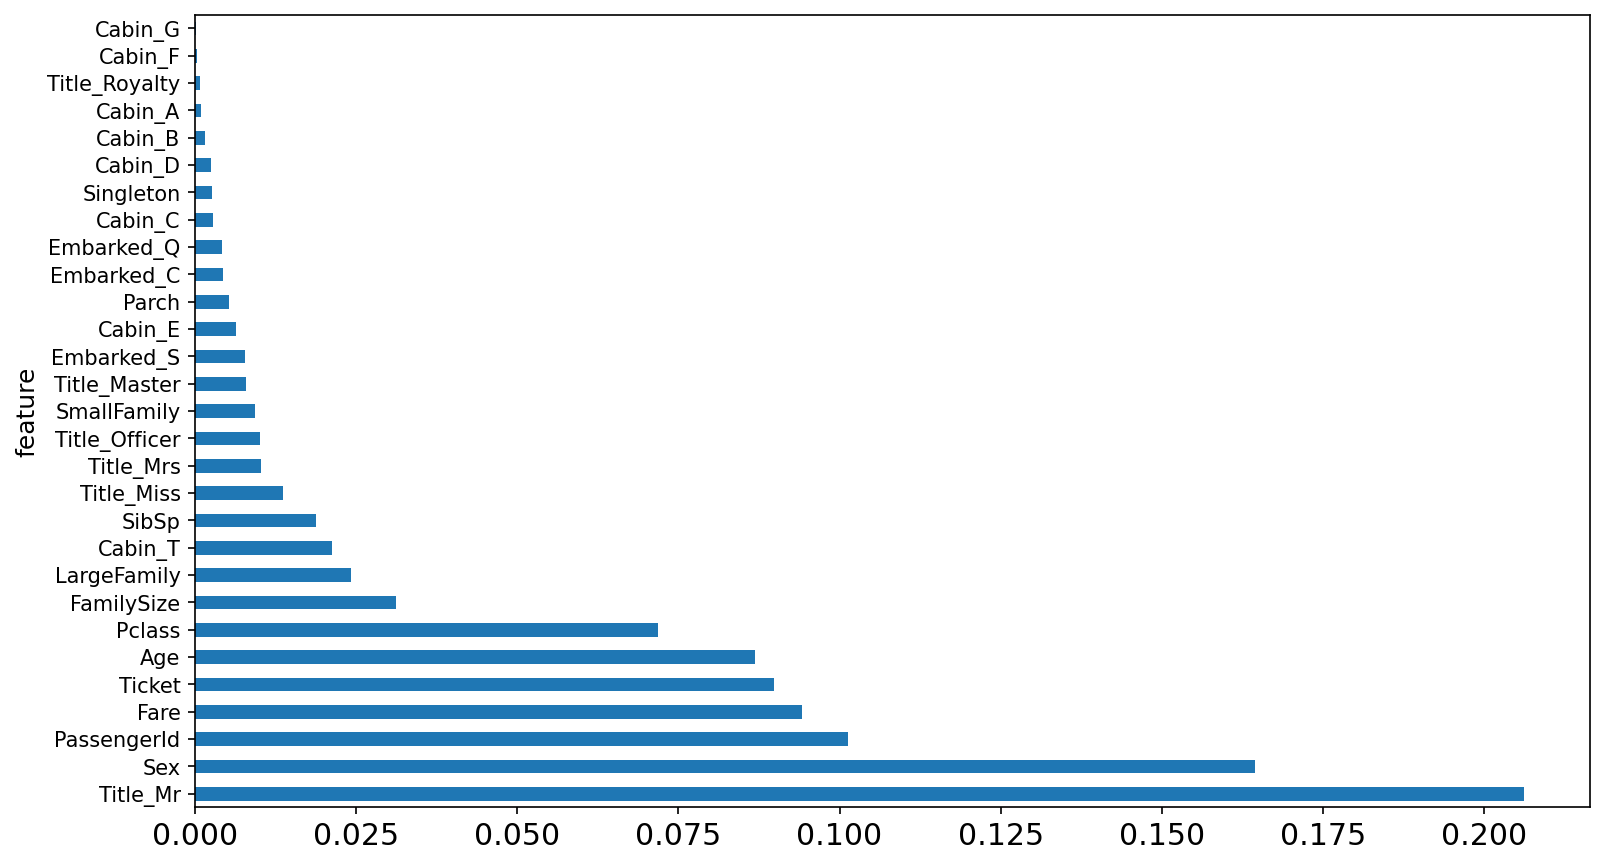

In [16]:
def plot_fi(fi): return fi.plot('feature', 'importance', 'barh', figsize=(12,7), legend=False)
plot_fi(df_importance[:30]);

In [17]:
to_keep = df_importance[df_importance['importance'] > 0.01]['feature'].tolist()
len(to_keep)

14

In [18]:
new_x_train = x_train1[to_keep]
new_x_train

,Title_Mr,Sex,PassengerId,Fare,Ticket,Age,Pclass,FamilySize,LargeFamily,Cabin_T,SibSp,Title_Miss,Title_Mrs,Title_Officer
0,1,2,1,7.2500,139,22.0,3,2,0,1,1,0,0,0
1,0,1,2,71.2833,154,38.0,1,2,0,0,1,0,1,0
2,0,1,3,7.9250,165,26.0,3,1,0,1,0,1,0,0
3,0,1,4,53.1000,3,35.0,1,2,0,0,1,0,1,0
4,1,2,5,8.0500,108,35.0,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,1,2,827,56.4958,18,26.0,3,1,0,1,0,0,0,0
827,0,2,828,37.0042,156,1.0,2,3,0,1,0,0,0,0
828,1,2,829,7.7500,102,26.0,3,1,0,1,0,0,0,0
829,0,1,830,80.0000,3,62.0,1,1,0,0,0,0,1,0


In [19]:
m = RandomForestClassifier(n_estimators=180,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(new_x_train,y_train1)
m.score(new_x_train,y_train1)

0.9265944645006017

In [20]:
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1, random_state=1)
m.fit(X[to_keep], y)
m.score(X[to_keep], y)

0.9349046015712682

In [21]:
x_test = teste[to_keep]
output=m.predict(x_test).astype(int)

In [22]:
resultado = pd.DataFrame()
resultado['PassengerId'] = teste['PassengerId']
resultado['Survived'] = output
resultado.to_csv('../../data/submissions/rf_v4.csv', index=False)

In [23]:
gt = pd.read_csv('../../data/original/ground_truth.csv')
print(classification_report(gt['Survived'], output))
print(accuracy_score(gt['Survived'], output))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       260
           1       0.73      0.68      0.71       158

    accuracy                           0.78       418
   macro avg       0.77      0.76      0.77       418
weighted avg       0.78      0.78      0.78       418

0.784688995215311


In [24]:
bm = pd.read_csv('../../data/submissions/current_best_model.csv')
accuracy_score(gt['Survived'], bm['Survived'])

0.7799043062200957

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [26]:
tX = X[to_keep]
def model_crossval_accuracy(model):
    accuracy = round(cross_val_score(model, tX, y, cv=10, scoring='accuracy').mean() * 100, 2)
    return accuracy

In [27]:
lr = LogisticRegression(solver='liblinear')
svc = SVC(gamma = "auto")
rf = RandomForestClassifier(random_state = SEED, n_estimators = 100)
knn = KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state = SEED)
gbc = GradientBoostingClassifier(random_state = SEED)
abc = AdaBoostClassifier(random_state = SEED)
etc = ExtraTreesClassifier(random_state = SEED)
xgbc = XGBClassifier(random_state = SEED, use_label_encoder=False)

models = [lr, svc, rf, knn, gnb, dt, gbc, abc, etc, xgbc]
models_str = ['lr', 'svc', 'rf', 'knn', 'gnb', 'dt', 'gbc', 'abc', 'etc', 'xgbc']

crossval_scores = list(map(model_crossval_accuracy, models))
crossval_scores_df = pd.DataFrame(crossval_scores, columns=['score'], index=models_str).sort_values(by="score", ascending=False)

C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [28]:
crossval_scores_df

,score
rf,83.50
lr,82.94
etc,82.94
gbc,81.93
gnb,79.24
xgbc,79.13
abc,77.37
dt,72.73
svc,61.62
knn,59.15


In [37]:
def tune_model_params(model, params):
    gridsearch = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=10, verbose=4, return_train_score=True)
    gridsearch.fit(tX, y)
    best_params, best_score = gridsearch.best_params_, round(gridsearch.best_score_*100, 2)
    return best_params, best_score

In [39]:
# gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
#               "max_depth": [4, 6, 8],
#               "max_features": [1.0, 0.3, 0.1], 
#               "min_samples_split": [ 2, 3, 4],
#               "random_state":[SEED]}

rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 20, 50, 100, 180, 200],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "n_jobs": [-1],
             "random_state":[SEED]}

# abcParams = {"n_estimators":[20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
#               "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
#               "random_state":[SEED]}

# etcParams = {"max_depth":[None],
#               "max_features":[1, 3, 10],
#               "min_samples_split":[2, 3, 10],
#               "min_samples_leaf":[1, 3, 10],
#               "bootstrap":[False],
#               "n_estimators":[100, 300],
#               "criterion":["gini"],
#               "random_state":[SEED]}

models_totune = [rf]#, dt, gbc, abc, etc]
models_totune_str = ['rf']#, 'gbc', 'abc', 'etc']
models_totune_params = [rfParams]#, gbcParams, abcParams, etcParams]
best_params_and_scores = list(map(tune_model_params, models_totune, models_totune_params))

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


In [40]:
best_params_and_scores_df = pd.DataFrame(best_params_and_scores, columns=['best_params', 'best_score'], index=models_totune_str).sort_values(by='best_score', ascending=False)
pd.set_option("max_colwidth", None)
best_params_and_scores_df

,best_params,best_score
rf,"{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 1}",84.74


In [70]:
# n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1, random_state=1
p = {'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 1}
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1, random_state=1)
m.fit(X[to_keep], y)
m.score(X[to_keep], y)

0.9349046015712682

In [71]:
x_test = teste[to_keep]
output=m.predict(x_test).astype(int)

In [69]:
print(classification_report(gt['Survived'], output))
print(accuracy_score(gt['Survived'], output))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       260
           1       0.73      0.68      0.71       158

    accuracy                           0.78       418
   macro avg       0.77      0.76      0.77       418
weighted avg       0.78      0.78      0.78       418

0.784688995215311
